## ROC_AUC for Breast Cancer predtction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.datasets import load_breast_cancer

In [2]:
breast = load_breast_cancer()
X = breast.data[:, 6:7]
#X = breast.data
y = breast.target
class_names = breast.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1 )
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#X.shape, y.shape

((455, 1), (114, 1), (455,), (114,))

In [3]:
from sklearn.preprocessing import StandardScaler
sclar=StandardScaler()
X_train=sclar.fit_transform(X_train)
X_test=sclar.transform(X_test)

In [4]:
#confusion matrix

In [5]:
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

Confusion matrix, without normalization
Normalized confusion matrix


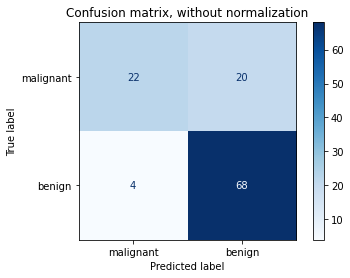

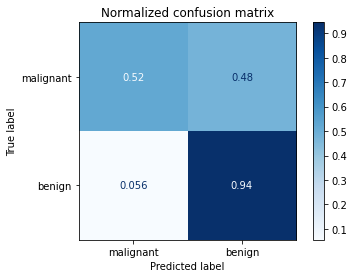

In [6]:
# Plot non-normalized confusion matrix
titles_options =[('Confusion matrix, without normalization', None),
                ('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp= plot_confusion_matrix(classifier, X_test, y_test, 
                                display_labels=class_names,cmap=plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
plt.show()

In [7]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pipe_svc= make_pipeline(StandardScaler(), SVC(random_state=1, probability=True))

In [8]:
y_clf = pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1])

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[32 10]
 [ 6 66]]


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        42
           1       0.87      0.92      0.89        72

    accuracy                           0.86       114
   macro avg       0.86      0.84      0.85       114
weighted avg       0.86      0.86      0.86       114



## ROC curve

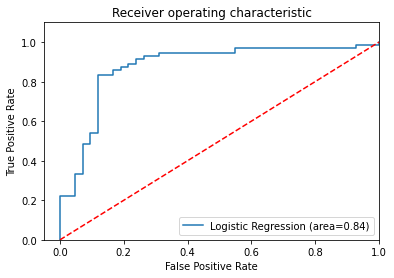

In [11]:
logit_roc_auc=roc_auc_score(y_test, pipe_svc.predict(X_test))
fpr, tpr, threshold =roc_curve(y_test,pipe_svc.predict_proba(X_test)[:,1] )
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()